<a href="https://colab.research.google.com/github/Vedant-Baldwa/Number-System-Converter/blob/main/Neural_Networks_for_Handwritten_Digit_Recognition%2C_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential
tf.autograph.set_verbosity(0)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X=np.load("/content/drive/MyDrive/Colab Notebooks/X.npy")
y=np.load("/content/drive/MyDrive/Colab Notebooks/y.npy")
X = X[0:1000]
y = y[0:1000]

In [ ]:
print(X.shape)
print(y.shape)

(1000, 400)
(1000, 1)



*  So we have a data set where x is the data and y is the output/outcome of the data.
*  x is a matrix of dimensions (1000,400), i.e there is 1000 examples of test data and each data is a array of 400 numbers.
*   These numbers are the pixels of the handwritten numbers.
*   Each training example is a 20-pixel x 20-pixel grayscale image of the digit. therefore 400 digits.
*   The second part of the training set is a 1000 x 1 dimensional vector y that contains labels for the training set
y = 0 if the image is of the digit 0, y = 1 if the image is of the digit 1.



# Data Visualization

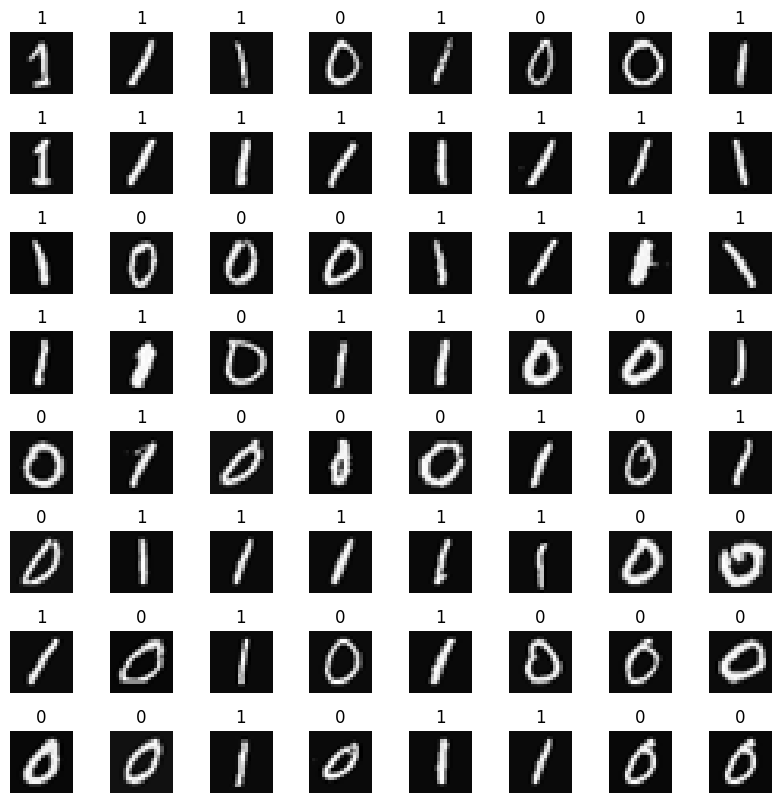

In [ ]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

*   The neural network which we will use is a three dense layered network with sigmoid activation.

*   400 ---> layer_1(25 units) --->25 ---> layer_2(15 units) ---> layer_3(1 unit) ---> output

* The shape of W and B for the respective layers will be :
    *  layer1: The shape of W1 is (400, 25) and the shape of b1 is (25,)

    *  layer2: The shape of W1 is (400, 15) and the shape of b1 is (15,)
    
    *  layer3: The shape of W1 is (400, 1) and the shape of b1 is (1,)

# Tensorflow Model Implementation

In [ ]:
model=Sequential(
    [
        tf.keras.Input(shape=(400,)),
        tf.keras.layers.Dense(units=25,activation="sigmoid",name="layer_1"),
        tf.keras.layers.Dense(units=15,activation="sigmoid",name="layer_2"),
        tf.keras.layers.Dense(units=1,activation="sigmoid",name="layer_3")
    ],name="my_model"
)

In [ ]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                      │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
[layer1,layer2,layer3]=model.layers

In [ ]:
w1, b1 = layer1.get_weights()
w2, b2 = layer2.get_weights()
w3, b3 = layer3.get_weights()
print(f"W1 shape = {w1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {w2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {w3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6900
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5278
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3919
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2810
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2022
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1534
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1179
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0928
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0781
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0651
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0561
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0507
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0417
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0399
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344
Epoch 16/20
32/32 ━

In [ ]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
 predicting a zero: [[0.01418868]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
 predicting a one:  [[0.9767518]]


In [ ]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


In [ ]:
##----------------------Do Not RUN ----------------------------------##

#correct=0
#for i in range(1000):
#    pred=model.predict(X[i].reshape(1,400),verbose=0)
#    if prediction >= 0.5:
#        yhat = 1
#    else:
#        yhat = 0
#    if (y[i,0]==yhat):
#        correct+=1
#acc=correct/10
#print("Accuracy :",acc,"%")

Accuracy : 50.0 %


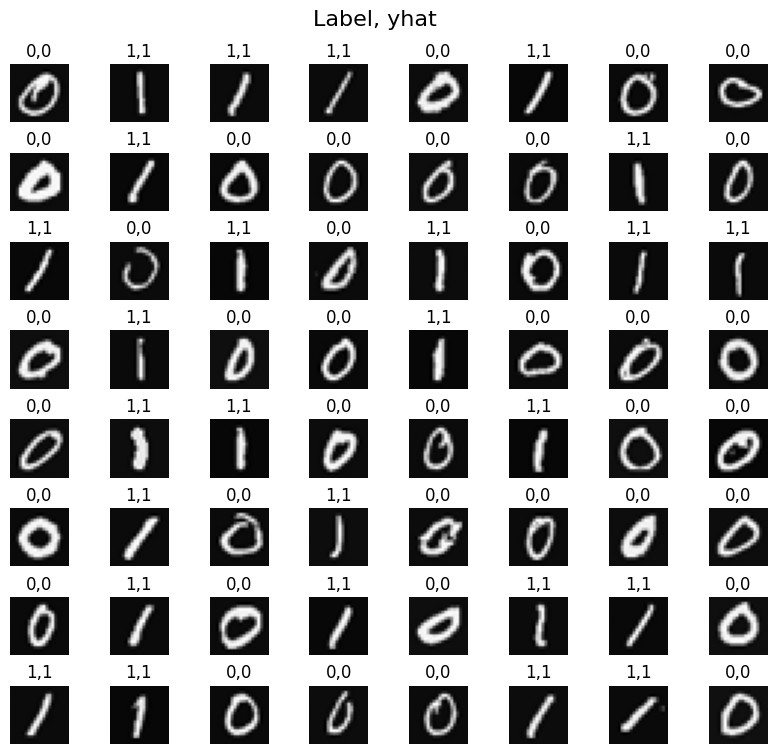

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400),verbose=0)
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

# NumPy Model Implementation (Forward Prop in NumPy)

In [ ]:
def g(z):
    x=1/(1+np.exp(-z))
    return x

In [ ]:
def dense(a_in,w,b,g):
    units=w.shape[1]
    a_out=np.zeros(units)
    for i in range(units):
        W=w[:,i]
        z=np.dot(W,a_in)+b[i]
        a_out[i]=g(z)
    return a_out

In [ ]:
def my_Sequential(x,w1,b1,w2,b2,w3,b3):
    a1=dense(x,w1,b1,g)
    a2=dense(a1,w2,b2,g)
    a3=dense(a2,w3,b3,g)
    return a3

In [ ]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [ ]:
prediction = my_Sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_Sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


<ipython-input-69-807162c7b232>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_yhat = int(my_prediction >= 0.5)
<ipython-input-69-807162c7b232>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tf_yhat = int(tf_prediction >= 0.5)


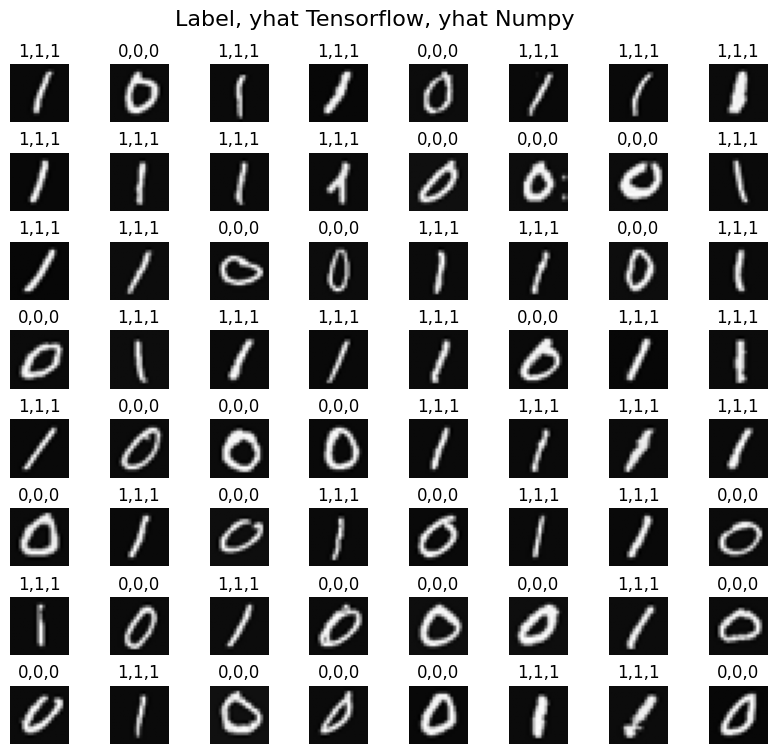

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_Sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400),verbose=0)
    tf_yhat = int(tf_prediction >= 0.5)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

# Vectorized NumPy Model Implementation

In [ ]:
def g(z):
    x=1/(1+np.exp(-z))
    return x

In [ ]:
def v_dense(a_in,w,b,g):
    a_out=g(np.matmul(a_in,w)+b)
    return a_out

In [ ]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 =v_dense(X,  W1, b1, g)
    A2 =v_dense(A1, W2, b2,g)
    A3 =v_dense(A2, W3, b3,g)
    return(A3)

In [ ]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [ ]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Yhat = (Prediction >= 0.5).astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


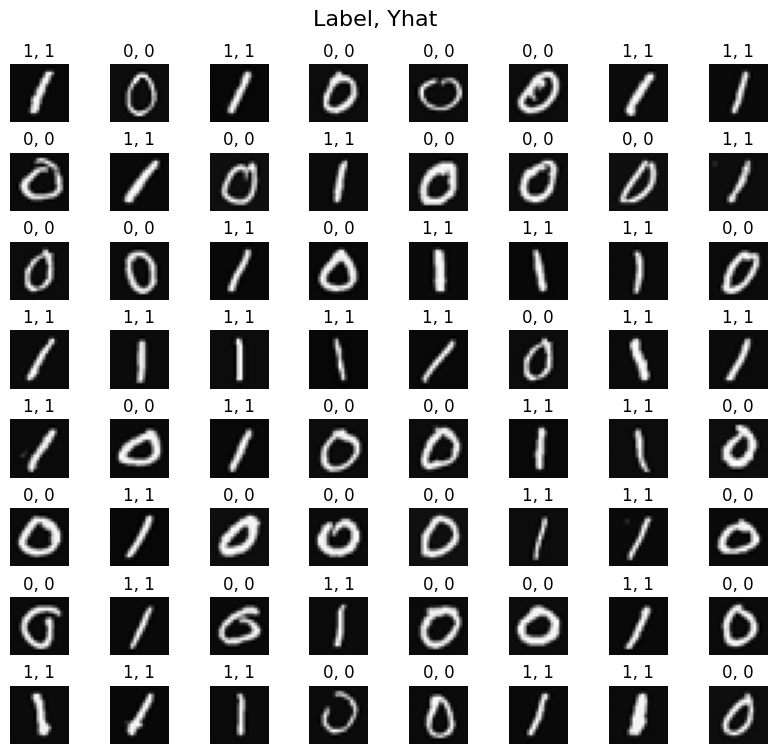

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off()
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

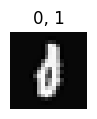

In [ ]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()

# NumPy Broadcasting

In [ ]:
import numpy as np

In [ ]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)

[[1]
 [2]
 [3]
 [4]]
[[1 2 3]]


In [ ]:
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

(a + b).shape: (4, 3), 
a + b = 
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]


In [ ]:
print(f"(a * b).shape: {(a * b).shape}, \na + b = \n{a * b}")

(a * b).shape: (4, 3), 
a + b = 
[[ 1  2  3]
 [ 2  4  6]
 [ 3  6  9]
 [ 4  8 12]]
